<a href="https://colab.research.google.com/github/Oscarcasas92/SVM-analisis-de-cancer/blob/master/Redes_y_SVM_proyecto_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine applied to Cancer Prediction.

#i) Explicación del SVM
###SVM (Support Vector Machine)
Una máquina de vectores de soporte (SVM) es un algoritmo de aprendizaje supervisado que se puede emplear para clasificación binaria o regresión. Las máquinas de vectores de soporte son muy populares en aplicaciones como el procesamiento del lenguaje natural, el habla, el reconocimiento de imágenes y la visión artificial.


In [15]:
# Explicacion tomada del libro Phyton data Science Handbook - Jake Vanderplas

import os
import matplotlib.pyplot as plt #
from pandas_datareader import DataReader
import pandas as pd; import math; import numpy as np
from scipy import stats #
from sklearn import svm
import numpy as np
import seaborn as sns; sns.set()#

In [16]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=200,centers=2, random_state=0,cluster_std=0.60)
X[:5]

array([[2.51526543, 1.11143935],
       [1.8155981 , 1.11969719],
       [2.69637316, 0.62563218],
       [1.67280531, 0.65930057],
       [1.89593761, 5.18540259]])

En el siguiente ejemplo idealizado para 2-dimensiones, la representación de los datos a clasificar se realiza en el plano x-y. El algoritmo SVM trata de encontrar un hiperplano 1-dimensional (en el ejemplo que nos ocupa es una recta) que une a las variables predictoras y constituye el límite que define si un elemento de entrada pertenece a una categoría o a la otra.

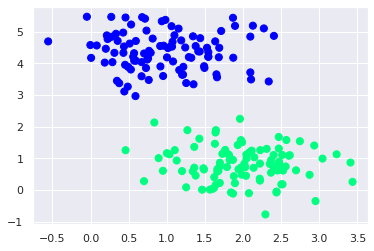

In [21]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter')

#plt.scatter(X[y == 0,0], X[y == 0,1], s=50, cmap="Salmon")
#plt.scatter(X[y == 1,0], X[y == 1,1], s=50, cmap="skyblue")
plt.show()

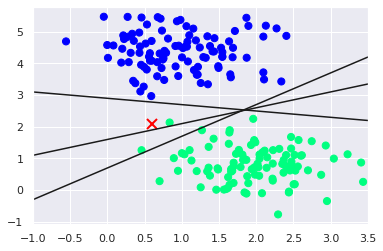

In [22]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter')
plt.plot([0.6],[2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1,0.70),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit + b, '-k')
    
plt.xlim(-1, 3.5);
plt.show()

La mejor solución es aquella que permita un margen máximo entre los elementos de las dos categorías.

Se denominan vectores de soporte a los puntos que conforman las dos líneas paralelas al hiperplano, siendo la distancia entre ellas (margen) la mayor posible.

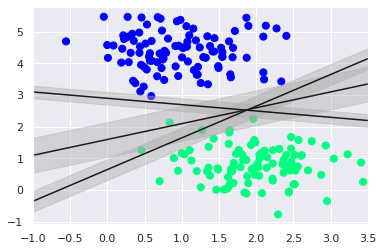

In [23]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter')

for m, b, d in [(1,0.65, 0.33),(0.5,1.6, 0.55),(-0.2,2.9,0.2)]:
    yfit= m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none',
                    color="#AAAAAA", alpha=0.4)
    
plt.xlim(-1, 3.5);
plt.show()

In [6]:
from sklearn.svm import SVC #"Support vector Classifier"
model =SVC(kernel ='linear', C= 1)
model.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
def plot_svc_decision_function(model, ax= None, plot_support= True):
    """Plot the decision function for a 2D SVC """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
    #Create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X, Y, P, colors= 'k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors='none');
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        

En ese concepto de "separación óptima" es donde reside la característica fundamental de las SVM: este tipo de algoritmos buscan el hiperplano que tenga la máxima distancia (margen) con los puntos que estén más cerca de él mismo. Por eso también a veces se les conoce a las SVM como clasificadores de margen máximo. De esta forma, los puntos del vector que son etiquetados con una categoría estarán a un lado del hiperplano y los casos que se encuentren en la otra categoría estarán al otro lado.


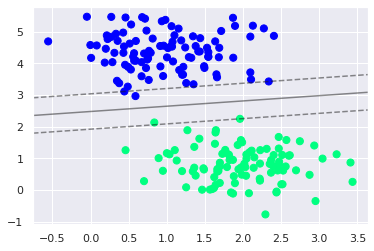

In [24]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);
plt.show()

In [26]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [0.59009904, 2.96974544],
       [2.33812285, 3.43116792],
       [0.83685684, 2.13635938],
       [1.96066731, 2.25169776]])

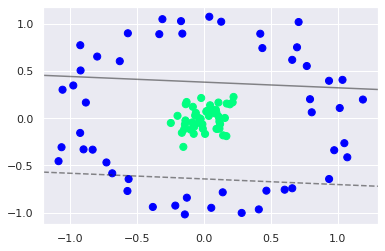

In [27]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf=SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);
plt.show()

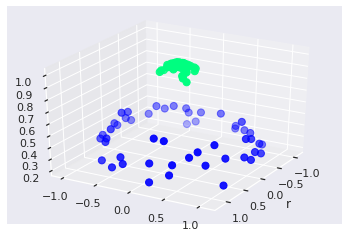

In [28]:
r =np.exp(-(X**2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim= 30, X=X, y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_xlabel('y')
    ax.set_xlabel('r')

plot_3D()

In [29]:
clf= SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

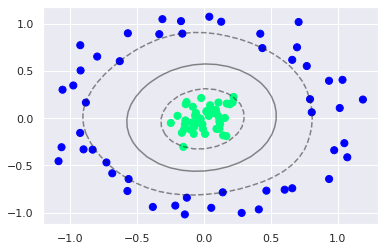

In [30]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],
           s=300,lw=1, facecolors='none')








v) Chequeo del Modelamiento(Overfitting)


##ii) Caso práctico(Explicación data)


# Conjunto de datos
### Breast Cancer Wisconsin (Diagnostic) Data Set
La base de datos Breast Cancer Wisconsin (Diagnostic)  contiene un conjunto de características las cuales fueron obtenidas a partir de una imagen digitalizada, de un aspirado con aguja fina (FNA) de una masa mamaria. Este conjunto de parametros describe los núcleos celulares presentes en las imagen. 

### Descripcion de los datos
Las caracteristicas calculadas para cada imagen fueron las siguientes:

1. radio (media de distancias desde el centro a puntos en el 2. perímetro)
3. textura (desviación estándar de valores de escala de grises)
4. perímetro
5. Area
6. suavidad (variación local en longitudes de radio)
7. compacidad (perímetro ^ 2 / área - 1.0)
8. concavidad (severidad de las porciones cóncavas del contorno)
9. puntos cóncavos (número de porciones cóncavas del contorno)
10. simetría
dimensión fractal ("aproximación de la costa" - 1)

Para cada uno de estos parametros, en las imagenes se calculo: la media, el error estándar y el "peor"(media de los tres valores más grandes). Con esto se obtuvo un conjunto final de 30 características. 

La distribucion de las clases esta dada de la siguiente manera: 357 benignas y 212 malignas, para un total de 569 imagenes analizadas.

Leemos los datos como sigue

##iii) Modelamiento SVM
# Implementacion de SVM (Support Vector Machine)

# Librerias 
A continuacion se presenta el conjunto de librerias que se usaran en el desarollo del proyecto

In [46]:
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

In [47]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
np.random.seed(1)
data1 = pd.read_csv('data1.csv',sep=',')
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
#print(nX[:,1:5])
X1 = data1.drop('diagnosis', axis=1) #Datos de x no mas
X1 = preprocessing.scale(X1)
y1 = data1['diagnosis'] #Datos de y

Xtr, Xts, ytr, yts = train_test_split(X1, y1, test_size = 0.20) #Datos de entrenamiento

In [49]:
#Linear Kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(Xtr, ytr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

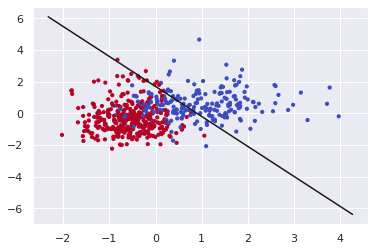

In [50]:
plt.scatter(Xtr[:,0],Xtr[:,1], c=ytr, s=10, cmap='coolwarm')

ax = plt.gca()
xlim=ax.get_xlim()

ax.scatter(Xts[:,0], Xts[:,1], c=yts, s=10, cmap='coolwarm')

w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0],xlim[1] )
yy = a * xx - (svclassifier.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.show()

## Linear Kernel

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



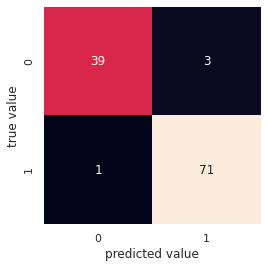

In [51]:
y_predLineal = svclassifier.predict(Xts) #Predecir los nuevos x
#print(confusion_matrix(yts,y_predLineal))
print(classification_report(yts,y_predLineal))

mat = confusion_matrix(yts, y_predLineal)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Polinomial Kernel

              precision    recall  f1-score   support

           0       0.82      0.21      0.34        42
           1       0.68      0.97      0.80        72

    accuracy                           0.69       114
   macro avg       0.75      0.59      0.57       114
weighted avg       0.73      0.69      0.63       114



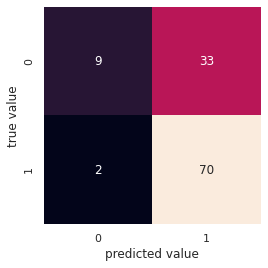

In [52]:
#Polinomial Kernel
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(Xtr, ytr)
y_predPoli = svclassifier.predict(Xts)
#print(confusion_matrix(yts,y_predPoli))
print(classification_report(yts,y_predPoli))

mat = confusion_matrix(yts, y_predPoli)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Gaussian Kernel

In [53]:
#Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(Xtr, ytr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

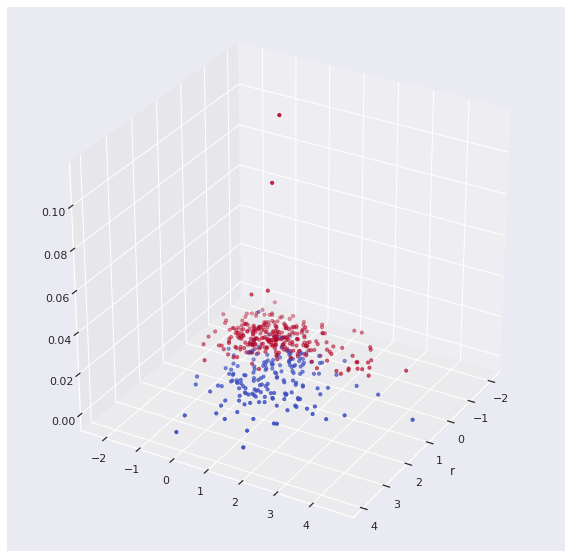

In [54]:
r =np.exp(-(Xtr**2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim= 30, Xtr=Xtr, ytr=ytr):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(Xtr[:,0],Xtr[:,1],r, c=ytr, s=10, cmap='coolwarm')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_xlabel('y')
    ax.set_xlabel('r')

plt.figure(figsize=(10,10))
plot_3D()

In [56]:
from ipywidgets import interact,fixed
interact(plot_3D, elev =[-90,90], azip=(-180,180),
        Xtr=fixed(Xtr), ytr=fixed(ytr));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



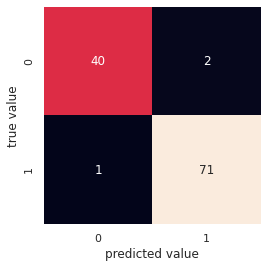

In [55]:
y_predGauss = svclassifier.predict(Xts)
#print(confusion_matrix(yts,y_predGauss))
print(classification_report(yts,y_predGauss))

mat = confusion_matrix(yts, y_predGauss)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Sigmoid Kernel

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



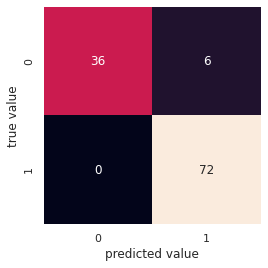

In [57]:
#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(Xtr, ytr)
y_predSig = svclassifier.predict(Xts)
#print(confusion_matrix(yts,y_predSig))
print(classification_report(yts,y_predSig))


mat = confusion_matrix(yts, y_predSig)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [58]:
y_predLineal[10]
yts = np.array(yts)
countLineal=0;
rowLineal = yts.shape[0]
yts[0]
#countLineal, countPoli=0; How to define several variable sin a line.
for i in range(rowLineal):
	print('%d (expected %d)' % (y_predLineal[i], yts[i]))
 
(countLineal/rowLineal)*100

1 (expected 1)
0 (expected 0)
1 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expecte

0.0

In [59]:
countLineal=0;
countPoli=0;
countGauss=0;
countSig=0;

rowLineal = yts.shape[0]

for i in range(rowLineal):
	if (y_predLineal[i]==yts[i]):
		countLineal += 1;
	if (y_predPoli[i]==yts[i]):
		countPoli += 1;
	if (y_predGauss[i]==yts[i]):
		countGauss += 1;
	if (y_predSig[i]==yts[i]):
		countSig += 1;

print((countLineal/rowLineal)*100)
print((countPoli/rowLineal)*100)
print((countGauss/rowLineal)*100)
print((countSig/rowLineal)*100)

96.49122807017544
69.2982456140351
97.36842105263158
94.73684210526315


# Implementacion de Red Neuronal
##iv) Modelamiento Redes
A continuacion se utiliza la liberia de Keras Sequential. La cual nos permite crear un modelo secuencial, a partir de la creacion de una pila de capas de manera secuancial. 

Se define ademas la topologia de esta red, la cual tendra  2 capas densas la primera con 12 neuronas y la siguiente con 8. A la salida se presenta una capa con una reurona debiado a que el tipo de clasificacion qeu se hara sobre los datos correponde a una salida binaria




# Librerias 

A continuacion se presenta el conjunto de librerias que se usaran en el desarollo del proyecto

In [62]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr
from sklearn import preprocessing
import pandas as pd

In [63]:
# load the dataset
dataset = loadtxt('data1.csv', delimiter=',', skiprows=1)
# split into input (X) and output (y) variables
X = dataset[:,1:31];X = preprocessing.scale(X)
Y = dataset[:,0]
Xtr, Xts, ytr, yts = train_test_split(X, Y, test_size = 0.20)
dataset

array([[ 0.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 0.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 0.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 0.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 0.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 1.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

# Grafica de conjunto de datos
A continuacion se muestra el conjunto de datos graficado, donde los puntos Rojos correponden a la clasificacion de Cancer Maligno y los puntos Azules corresponden a la Clasificacion de Cancer Benigno

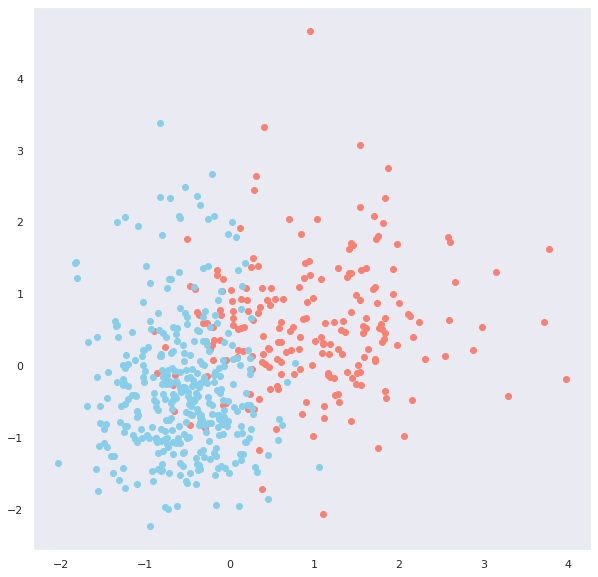

In [64]:
# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(0, 0, res)
_x1 = np.linspace(0, 0, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(10, 10))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)


#Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="Salmon")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="skyblue")

#plt.tick_params(labelbottom=False, labelleft=False)

In [66]:
#lr = 0.01          # learning rate
nn = [12, 24, 1]  # número de neuronas por capa.

# Creamos el objeto que contendrá a nuestra red neuronal, como una secuencia de capas.
model = Sequential()

# Añadimos la capa 1
l1 = model.add(Dense(nn[0], input_dim=30, activation='relu'))

# Añadimos la capa 2
l2 = model.add(Dense(nn[1], activation='relu'))

# Añadimos la capa 3
l3 = model.add(Dense(nn[2], activation='sigmoid'))

A continuación compilamos el modelo, definiendo la función de perdida y el optimizador.

In [67]:
# Compilamos el modelo, definiendo la función de perdida y el optimizador.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['accuracy'])
# Entrenamos al modelo con los datos 
model.fit(Xtr, ytr, epochs=150)

#model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
455/455 [==============================] - 0s 824us/step - loss: 0.5945 - accuracy: 0.7670
Epoch 2/150
455/455 [==============================] - 0s 56us/step - loss: 0.5187 - accuracy: 0.8637
Epoch 3/150
455/455 [==============================] - 0s 53us/step - loss: 0.4567 - accuracy: 0.9033
Epoch 4/150
455/455 [==============================] - 0s 57us/step - loss: 0.3977 - accuracy: 0.9165
Epoch 5/150
455/455 [==============================] - 0s 51us/step - loss: 0.3422 - accuracy: 0.9231
Epoch 6/150
455/455 [==============================] - 0s 51us/step - loss: 0.2886 - accuracy: 0.9319
Epoch 7/150
455/455 [==============================] - 0s 48us/step - loss: 0.2397 - accuracy: 0.9363
Epoch 8/150
455/455 [==============================] - 0s 45us/step - loss: 0.2009 - accuracy: 0.9473
Epoch 9/150
455/455 [==============================] - 0s 50us/step - loss: 0.1711 - accuracy: 0.9516
Epoch 10/150
455/455 [==============================] - 0s 54us/step - loss: 0.14

Finalmente evaluamos nuestro modelo con los datos de validacion obteniendo asi de esta manera un Accuracy de 94.74

In [68]:
# evaluate the keras model
_, accuracy = model.evaluate(Xts, yts)
print('Accuracy: %.2f' % (accuracy*100))

114/114 [==============================] - 0s 244us/step
Accuracy: 99.12


In [69]:
row1 = Xtr.shape[0]   #number of samples for train
row = Xts.shape[0]    #number of samples for test
print(row1);print(row)

455
114


In [70]:
predictions = model.predict_classes(Xts)
#the following loop will show all the predictions made over the 114 test values taken at the beginning.
#for i in range(row):
#	print('%s => %d (expected %d)' % (Xts[i].tolist(), predictions[i], yts[i]))
count=0;
for i in range(row):
	print('%d (expected %d)' % (predictions[i], yts[i]))
	if (predictions[i]==yts[i]):
		count += 1;
		
(count/row)*100

1 (expected 1)
0 (expected 0)
1 (expected 1)
0 (expected 0)
1 (expected 1)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
0 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 0)
1 (expected 1)
1 (expecte

99.12280701754386

## Análisis de Overfitting

# 70%-20%

In [71]:
dataset = pd.DataFrame(dataset)
train, validate, test = np.split(dataset.sample(frac=1), [int(.7*len(dataset)), int(.9*len(dataset))])
# print(train.shape)
# print(validate.shape)
# print(test.shape)

train.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
                 '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
validate.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
                 '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
test.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15',
                 '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']

Xtr = train.drop(['0'], axis=1)
Xval = validate.drop(['0'], axis=1)
Xts = test.drop(['0'], axis=1)

ytr = train['0']
yval = validate['0']
yts = test['0']

In [72]:
print(type(ytr))
print(type(yval))
print(type(yts))
#print(type(Xtr))
#print(type(Xval))
#Xtr.head
#Xval.head

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [73]:
#lr = 0.01          # learning rate
nn = [12, 24, 1]  # número de neuronas por capa.

# Creamos el objeto que contendrá a nuestra red neuronal, como una secuencia de capas.
model = Sequential()

# Añadimos la capa 1
l1 = model.add(Dense(nn[0], input_dim=30, activation='relu'))

# Añadimos la capa 2
l2 = model.add(Dense(nn[1], activation='relu'))

# Añadimos la capa 3
l3 = model.add(Dense(nn[2], activation='sigmoid'))

In [74]:
# Compilamos el modelo, definiendo la función de perdida y el optimizador.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['accuracy'])
# Entrenamos al modelo con los datos 
model.fit(Xtr, ytr, epochs=150)

#model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
398/398 [==============================] - 0s 347us/step - loss: 161.8327 - accuracy: 0.6256
Epoch 2/150
398/398 [==============================] - 0s 63us/step - loss: 95.9253 - accuracy: 0.6256
Epoch 3/150
398/398 [==============================] - 0s 57us/step - loss: 35.6664 - accuracy: 0.4598
Epoch 4/150
398/398 [==============================] - 0s 49us/step - loss: 16.7874 - accuracy: 0.3442
Epoch 5/150
398/398 [==============================] - 0s 47us/step - loss: 3.3298 - accuracy: 0.5226
Epoch 6/150
398/398 [==============================] - 0s 55us/step - loss: 0.6320 - accuracy: 0.8442
Epoch 7/150
398/398 [==============================] - 0s 76us/step - loss: 0.4895 - accuracy: 0.9045
Epoch 8/150
398/398 [==============================] - 0s 50us/step - loss: 0.4568 - accuracy: 0.8945
Epoch 9/150
398/398 [==============================] - 0s 52us/step - loss: 0.4864 - accuracy: 0.9146
Epoch 10/150
398/398 [==============================] - 0s 59us/step - loss:

In [75]:
# evaluate the keras model
_, accuracy = model.evaluate(Xval, yval)
print('Accuracy: %.2f' % (accuracy*100))

114/114 [==============================] - 0s 181us/step
Accuracy: 92.11


# 90%-10%

In [76]:
#X90, Xts, y90, yts = train_test_split(X, Y, test_size = 0.10)

X90 = pd.concat([Xtr,Xval], ignore_index= True)
y90 = pd.concat([ytr,yval],ignore_index= True)

# y90.head()
# X90.head()

In [77]:
#print(type(X90))
#X90.head()
#X90.shape
print(type(y90))
#y90.head()
#y90.shape

<class 'pandas.core.series.Series'>


In [78]:
# Compilamos el modelo, definiendo la función de perdida y el optimizador.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['accuracy'])
# Entrenamos al modelo con los datos 

model.fit(X90, y90, epochs=150)

#model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
512/512 [==============================] - 0s 297us/step - loss: 0.2034 - accuracy: 0.9180
Epoch 2/150
512/512 [==============================] - 0s 76us/step - loss: 0.1668 - accuracy: 0.9336
Epoch 3/150
512/512 [==============================] - 0s 45us/step - loss: 0.2316 - accuracy: 0.9277
Epoch 4/150
512/512 [==============================] - 0s 50us/step - loss: 0.1683 - accuracy: 0.9414
Epoch 5/150
512/512 [==============================] - 0s 45us/step - loss: 0.1581 - accuracy: 0.9336
Epoch 6/150
512/512 [==============================] - 0s 43us/step - loss: 0.2161 - accuracy: 0.9199
Epoch 7/150
512/512 [==============================] - 0s 44us/step - loss: 0.2062 - accuracy: 0.9336
Epoch 8/150
512/512 [==============================] - 0s 43us/step - loss: 0.1531 - accuracy: 0.9434
Epoch 9/150
512/512 [==============================] - 0s 48us/step - loss: 0.1348 - accuracy: 0.9492
Epoch 10/150
512/512 [==============================] - 0s 50us/step - loss: 0.19

In [79]:
# evaluate the keras model
_, accuracy = model.evaluate(Xts, yts)
print('Accuracy: %.2f' % (accuracy*100))

57/57 [==============================] - 0s 324us/step
Accuracy: 85.96


In [80]:
print(type(yts))

<class 'pandas.core.series.Series'>


In [81]:
print(type(X90))
print(type(y90))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Se encontró que el modelo no se pega a los datos, dado que los accuracies respectivos para validación y test son similares y no disminuyen de manera significativa.